# Supervised Learning with scikit-learn
Run the hidden code cell below to import the data used in this course.

In [3]:
# Importing pandas
import pandas as pd

# Importing the course datasets 
diabetes_df = pd.read_csv('datasets/diabetes_clean.csv')
music_df = pd.read_csv('datasets/music_clean.csv')
sales_df = pd.read_csv('datasets/advertising_and_sales_clean.csv')
churn_df = pd.read_csv("datasets/telecom_churn_clean.csv")

## The classification challenge : K-Nearest Neighbors

In [4]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the target variable
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [5]:
import numpy as np

X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions for X_new
print("Predictions: {}".format(y_pred)) 

Predictions: [0 1 0]


## Measuring model performance

In [6]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#knn model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8545727136431784


## Overfitting and underfitting

In [7]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors = neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
    
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351, 6: 0.8660915228807202, 7: 0.8705926481620405, 8: 0.8615903975993998, 9: 0.86384096024006, 10: 0.858589647411853, 11: 0.8604651162790697, 12: 0.8574643660915229} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991, 5: 0.8545727136431784, 6: 0.8590704647676162, 7: 0.8605697151424287, 8: 0.8620689655172413, 9: 0.863568215892054, 10: 0.8605697151424287, 11: 0.8605697151424287, 12: 0.8605697151424287}


## Visualizing model complexity

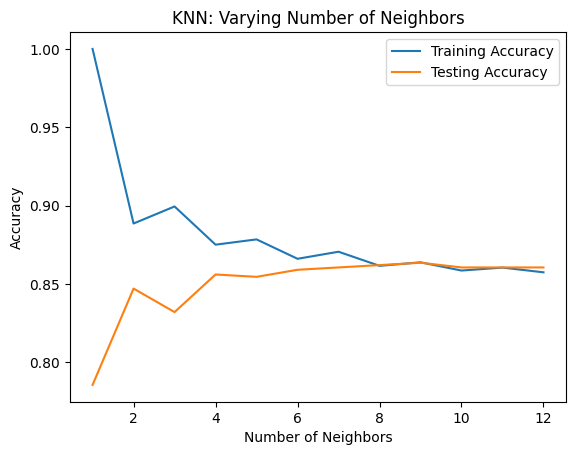

In [8]:
import matplotlib.pyplot as plt

# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

# Regression

In [9]:
sales_df

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18
...,...,...,...,...,...
4541,26000.0,4472.36,717.09,Micro,94685.87
4542,71000.0,20610.69,6545.57,Nano,249101.92
4543,44000.0,19800.07,5096.19,Micro,163631.46
4544,71000.0,17534.64,1940.87,Macro,253610.41


In [10]:
import numpy as np

# Create X from the radio column's values
X = sales_df['radio']

# Create y from the sales column's values
y = sales_df['sales']

# Reshape X
X = X.values.reshape(-1,1)

# Check the shape of the features and targets
print(X.shape,y.shape)

(4546, 1) (4546,)


## Building a linear regression model

In [11]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X,y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


## Visualizing a linear regression model

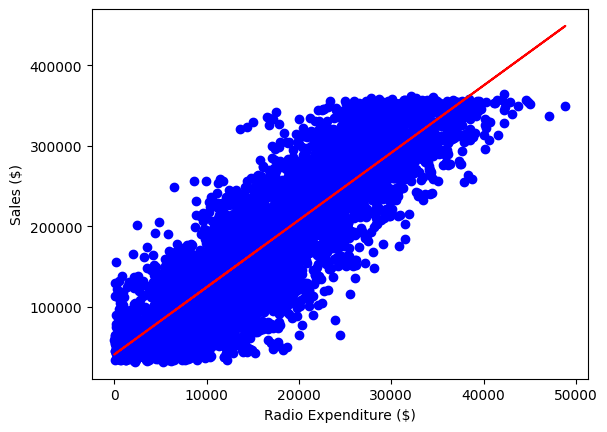

In [12]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

## Multiple linear regression model

In [13]:
# Create X and y arrays
X = sales_df.drop(["sales","influencer"], axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train,y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


## Regression performance

In [14]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.4331996001006


## Cross-validation for R-squared

In [15]:
# Import the necessary modules
from sklearn.model_selection import KFold, cross_val_score

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


In [16]:
# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))

0.9989896443678249
6.608118371529651e-05
[0.99889767 0.99908583]


## Regularized regression

### 1. Regularized regression: Ridge

If there are multiple intependent variables that are highly correlated
with each other (Multicollinearity), normal regression techniques 
like polynomial regression does not produce good results and overfitting
occurs instead. Ridge regression is used to regularize and reduce 
the standard errors to avoid over-fitting a regression model.

In [17]:
# Import Ridge
from sklearn.linear_model import Ridge

# When alpha = 0, the objective is equivalent to ordinary least squares, solved by the LinearRegression object.
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []

for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha)
  
  # Fit the data
  ridge.fit(X_train,y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test,y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


## 2. Lasso regression for feature importance

Lasso regression is what is called the Penalized regression method, often used in machine learning to select the subset of variables. It is a supervised machine learning method. Specifically, LASSO is a Shrinkage and Variable Selection method for linear regression models.

[ 3.56256962 -0.00397035  0.00496385]
Index(['tv', 'radio', 'social_media'], dtype='object')


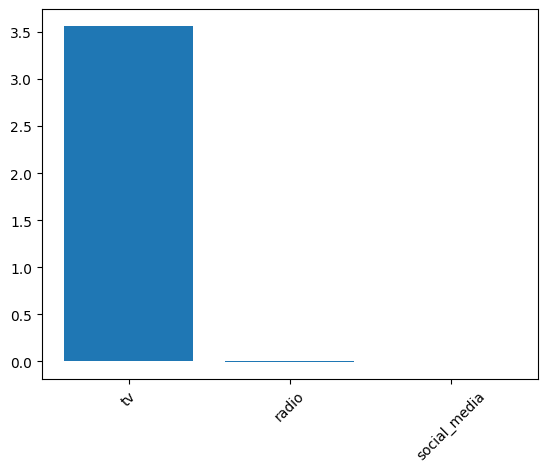

In [18]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
# When alpha = 0, the objective is equivalent to ordinary least squares, solved by the LinearRegression object.
lasso = Lasso(alpha=0.3) 

# Fit the model to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef) #higher the coef. heavier the feature importance

sales_columns = sales_df.drop(['sales','influencer'],axis=1).columns
print(sales_columns)

plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

# Fine-Tuning Your Model

## How good is your model?

In [19]:
diabetes_df

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [20]:
from sklearn.model_selection import train_test_split
X=diabetes_df.drop('diabetes', axis=1).values
y=diabetes_df['diabetes'].values

#split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

#model 
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[124  27]
 [ 42  38]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       151
           1       0.58      0.47      0.52        80

    accuracy                           0.70       231
   macro avg       0.67      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231



## Logistic regression and the ROC curve

In [23]:
# Import LogisticRegression
#LogisticRegression is best for binary classification
from sklearn.linear_model import LogisticRegression 

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train,y_train)

# Predict either 0 or 1 
y_pred = logreg.predict(X_test) #probabilities > 0.5 is considered 1 and, < 0.5 is considered 0
print(y_pred)

#Predict probabilities 
y_pred_probs =logreg.predict_proba(X_test) #gives probabilities 
print(y_pred_probs[:10])

#Predict the probabilities of each individual in the test set having a diabetes diagnosis, storing the array of positive probabilities as y_pred_probs.
y_pred_probs = logreg.predict_proba(X_test)[:,1]
y_pred_probs[:10]

[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 1 0 0 0 0 0]
[[0.73448977 0.26551023]
 [0.81663378 0.18336622]
 [0.87880351 0.12119649]
 [0.84386472 0.15613528]
 [0.50388802 0.49611198]
 [0.55417802 0.44582198]
 [0.98640753 0.01359247]
 [0.38353902 0.61646098]
 [0.44359468 0.55640532]
 [0.20688208 0.79311792]]


array([0.26551023, 0.18336622, 0.12119649, 0.15613528, 0.49611198,
       0.44582198, 0.01359247, 0.61646098, 0.55640532, 0.79311792])

## The ROC curve

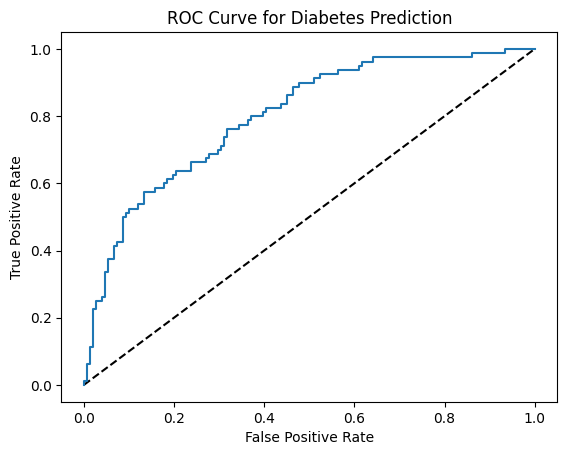

In [24]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr (Plot true positive rate against false positive rate)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

If the model performed worse than chance, the line would appear below the dotted line.
Hence, the ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.

## ROC AUC

The **ROC AUC score** tells us how efficient the model is. The higher the AUC, the better the model's performance at distinguishing between the positive and negative classes. An AUC score of 1 means the classifier can perfectly distinguish between all the Positive and the Negative class points

In [25]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.8002483443708608
[[121  30]
 [ 30  50]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



**Note:** logistic regression performs better than the KNN model across all the metrics you calculated

## Hyperparameter Tuning

### 1. Hyperparameter tuning with GridSearchCV

In [26]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Set up KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)

#lasso regression model
lasso = Lasso(alpha=0.3)

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train,y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 1e-05}
Tuned lasso score: 0.2978727046846532


**Note:** Unfortunately, the best model only has an R-squared score of 0.29, highlighting that using the optimal hyperparameters does not guarantee a high performing model!

## 2. Hyperparameter tuning with RandomizedSearchCV

In [27]:
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Set up KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)

#logistic regression model
logreg = LogisticRegression()

# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 0.4898469387755102, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.3387755102040817}
Tuned Logistic Regression Best Accuracy Score: 0.7653558052434457


**Note:** Even without exhaustively trying every combination of hyperparameters, the model has an accuracy of over 70% on the test set!

# Preprocessing and Pipelines

## Regression with categorical features

In [28]:
#shape of sales_df
print(sales_df.shape)

# Create sales_dummies
sales_dummies = pd.get_dummies(sales_df,drop_first=True)

# Print the new DataFrame's shape
print("Shape of sales_dummies: {}".format(sales_dummies.shape))

(4546, 5)
Shape of sales_dummies: (4546, 7)


In [29]:
sales_df

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18
...,...,...,...,...,...
4541,26000.0,4472.36,717.09,Micro,94685.87
4542,71000.0,20610.69,6545.57,Nano,249101.92
4543,44000.0,19800.07,5096.19,Micro,163631.46
4544,71000.0,17534.64,1940.87,Macro,253610.41


In [30]:
sales_dummies

,tv,radio,social_media,sales,influencer_Mega,influencer_Micro,influencer_Nano
0,16000.0,6566.23,2907.98,54732.76,1,0,0
1,13000.0,9237.76,2409.57,46677.90,1,0,0
2,41000.0,15886.45,2913.41,150177.83,1,0,0
3,83000.0,30020.03,6922.30,298246.34,1,0,0
4,15000.0,8437.41,1406.00,56594.18,0,1,0
...,...,...,...,...,...,...,...
4541,26000.0,4472.36,717.09,94685.87,0,1,0
4542,71000.0,20610.69,6545.57,249101.92,0,0,1
4543,44000.0,19800.07,5096.19,163631.46,0,1,0
4544,71000.0,17534.64,1940.87,253610.41,0,0,0


In [31]:
# Create X and y
X = sales_dummies.drop('sales',axis=1).values
y = sales_dummies['sales'].values

# Instantiate a ridge model
ridge = Ridge(alpha=0.2)

# Perform cross-validation
scores = cross_val_score(ridge,X,y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

Average RMSE: 2954.4288647620247
Standard Deviation of the target array: 93009.64169497312


## Handling missing data

In [32]:
# Print missing values for each column
print(sales_df.isna().sum().sort_values())

# Remove values where less than 5% are missing
sales_df = sales_df.dropna(subset=["tv", "radio"])

# Convert influencer to a binary feature
sales_df["influencer"] = np.where(sales_df["influencer"] == "Mega", 1, 0)

print(sales_df.isna().sum().sort_values())
print("Shape of the `sales_df`: {}".format(sales_df.shape))

tv              0
radio           0
social_media    0
influencer      0
sales           0
dtype: int64
tv              0
radio           0
social_media    0
influencer      0
sales           0
dtype: int64
Shape of the `sales_df`: (4546, 5)


In [33]:
sales_df

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,1,54732.76
1,13000.0,9237.76,2409.57,1,46677.90
2,41000.0,15886.45,2913.41,1,150177.83
3,83000.0,30020.03,6922.30,1,298246.34
4,15000.0,8437.41,1406.00,0,56594.18
...,...,...,...,...,...
4541,26000.0,4472.36,717.09,0,94685.87
4542,71000.0,20610.69,6545.57,0,249101.92
4543,44000.0,19800.07,5096.19,0,163631.46
4544,71000.0,17534.64,1940.87,0,253610.41


Remaining missing data is replaced using SimpleImputer which imputes missing data.

In [34]:
# Import modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Instantiate an imputer
imputer = SimpleImputer()

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors = 3)

# Build steps for the pipeline
steps = [("imputer", imputer), 
         ("knn", knn)]

In [35]:
# defining X and y
X = sales_df.drop('influencer',axis=1).values
y = sales_df['influencer'].values

#split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[944 182]
 [306  69]]


## Centering and Scaling (Normalization)

- Standardization : Subtract the mean and divide by variance
- Normalization : Data ranges from -1 to +1

**Scaling in Scikit-Learn**

In [47]:
from sklearn.preprocessing import StandardScaler

#define X,y
X = sales_df.drop("influencer", axis=1).values
y = sales_df["influencer"].values

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Instantiate a scaler
scaler = StandardScaler()

#scaling numerical and categorical data
X_train_scaled = scaler.fit_transform(X_train) #fit_transform numerical data
X_test = scaler.transform(X_test) #transform categorical data

print (np.mean(X), np.std(X))
print (np.mean(X_train_scaled), np.std(X_train_scaled))

66989.31262538495 89115.81857219992
-1.31907686094078e-16 1.0


**Scaling in a Pipeline**

In [48]:
#Building steps for pipeline
steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier(n_neighbors=6))]

#Create the pipeline
pipeline = Pipeline(steps)

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=21)

#fit pipeline on training data
knn_scaled = pipeline.fit(X_train , y_train)

#make predictions on test data
ypred = knn_scaled.predict(X_test)

#printing score for the model
print(knn_scaled.score(X_test, y_test))

0.721978021978022


**Comparing performance using unscaled data**

In [49]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

#model fit
knn_unscaled = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)

#printing score for the model
print(knn_unscaled.score(X_test, y_test))

0.7208791208791209


Scaled data definitely has more accuracy than unscaled data.

**CV and scaling in pipeline**

In [50]:
from sklearn.model_selection import GridSearchCV

#creating steps
steps = [("scaler", StandardScaler()),('knn', KNeighborsClassifier())]

#creating pipeline 
pipeline = Pipeline(steps)

#assigning parameters
"""specify hyperparameter space by creating a dictionary: the keys are the pipeline step name followed by a double underscore, followed by the hyperparameter name. The corresponding value is the list or an array of the values to try for that particular hyperparameter."""
parameters = {"knn__n_neighbors" : np.arange (1, 50)}

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =21)

#GridSearch CV object instantiate
cv = GridSearchCV(pipeline, param_grid=parameters)

#fit the model
cv.fit(X_train, y_train)

#predictions
y_pred = cv.predict(X_test)

**Checking model parameters**

In [53]:
# best accuracy with cv
cv.best_score_

0.7469746209773719

In [54]:
#best params to get best score
cv.best_params_

{'knn__n_neighbors': 34}

## Evaluating multiple models

**Evaluating Classification Models**

In [56]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [57]:
#create features and target arrays
X = sales_df.drop('influencer',axis=1).values
y = sales_df['influencer']

#split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42)

#instantize scaler
scaler = StandardScaler()

#scale features
X_train_scaled = scaler.fit_transform(X_train) #numerical data
X_test_scaled = scaler.transform(X_test) #categorical data

In [59]:
#create dictionary of models
models = {"Logistic Regression":LogisticRegression(),"KNN":KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier()}

#empty list to store results
results = []

In [60]:
#loop through the models in model dictionary 
for model in models.values():
    #instantiate K-Fold object
    kf = KFold(n_splits=6, shuffle=True, random_state=42)
    #perform cross validation
    cv_results = cross_val_score(model,X_train_scaled,y_train,cv=kf)
    #append cv_results to results
    results.append(cv_results)

In [61]:
results

[array([0.77589454, 0.74576271, 0.7490566 , 0.7245283 , 0.73396226,
        0.7490566 ]),
 array([0.71374765, 0.71186441, 0.69245283, 0.68490566, 0.66792453,
        0.69056604]),
 array([0.62146893, 0.6440678 , 0.63584906, 0.58679245, 0.61509434,
        0.59433962])]

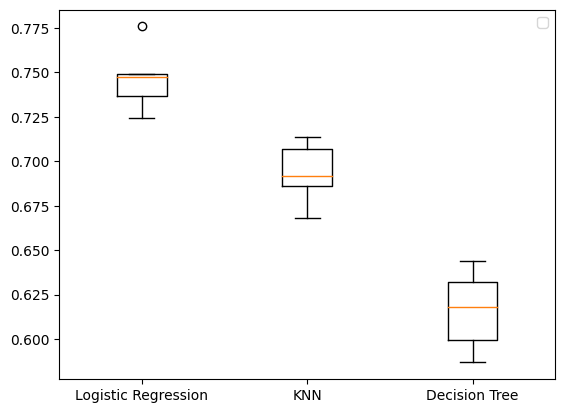

In [63]:
#boxplot of our results
plt.boxplot(results,labels=models.keys())
plt.legend()
plt.show()

**Test set performance**

In [65]:
#loop through each model
for name,model in models.items():
    #fit the model
    model.fit (X_train_scaled, y_train)
    #calculate score
    test_score = model.score(X_test_scaled, y_test)
    
    print("{} Test Set Accuracy: {}".format (name, test_score) )

Logistic Regression Test Set Accuracy: 0.7470674486803519
KNN Test Set Accuracy: 0.6942815249266863
Decision Tree Test Set Accuracy: 0.6180351906158358
